# <div style="color:white;display:fill;border-radius:5px;background-color:#0E2031;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Feature Importance</p></div> 

- **Filter Methods**   
    - Cross Validation
- **Enseemble Methods**
     - Optuna
- **Wrapper Methods**
     - Save Model

In [4]:
%%capture
%run part03_preparation.ipynb

In [14]:
#Visualization Tools
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Feature Importance Tools
from sklearn.feature_selection import SelectKBest, chi2, f_classif, SelectFromModel, VarianceThreshold, SelectPercentile
import shap
from shap import plots

import pickle

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Anova</p></div>

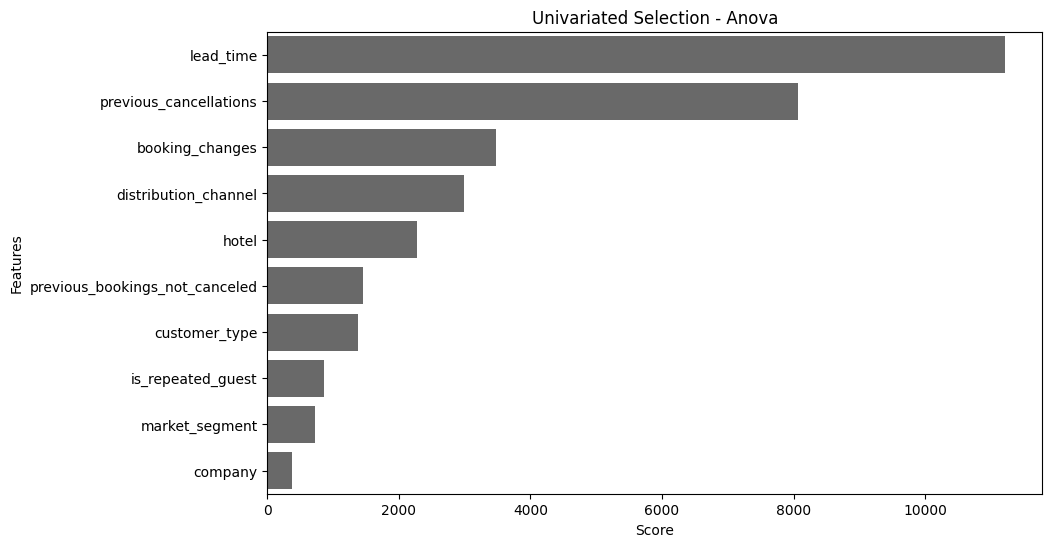

In [9]:
### Apply SelectKBest Algorithm - Anova
anova = SelectKBest(score_func=f_classif, k=10).fit(X,y)
anova_scores=pd.DataFrame(anova.scores_,columns=["Score"])
anova_columns=pd.DataFrame(X.columns)
anova_feature_rank=pd.concat([anova_columns,anova_scores],axis=1)
anova_feature_rank.columns=['Features','Score']
anova_feature_rank=anova_feature_rank.nlargest(10,'Score')

plt.figure(figsize=(10,6))
plt.title('Univariated Selection - Anova')
sns.barplot(data=anova_feature_rank, x='Score', y='Features', color='Dimgray');
plt.show()

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">Pearson</p></div>

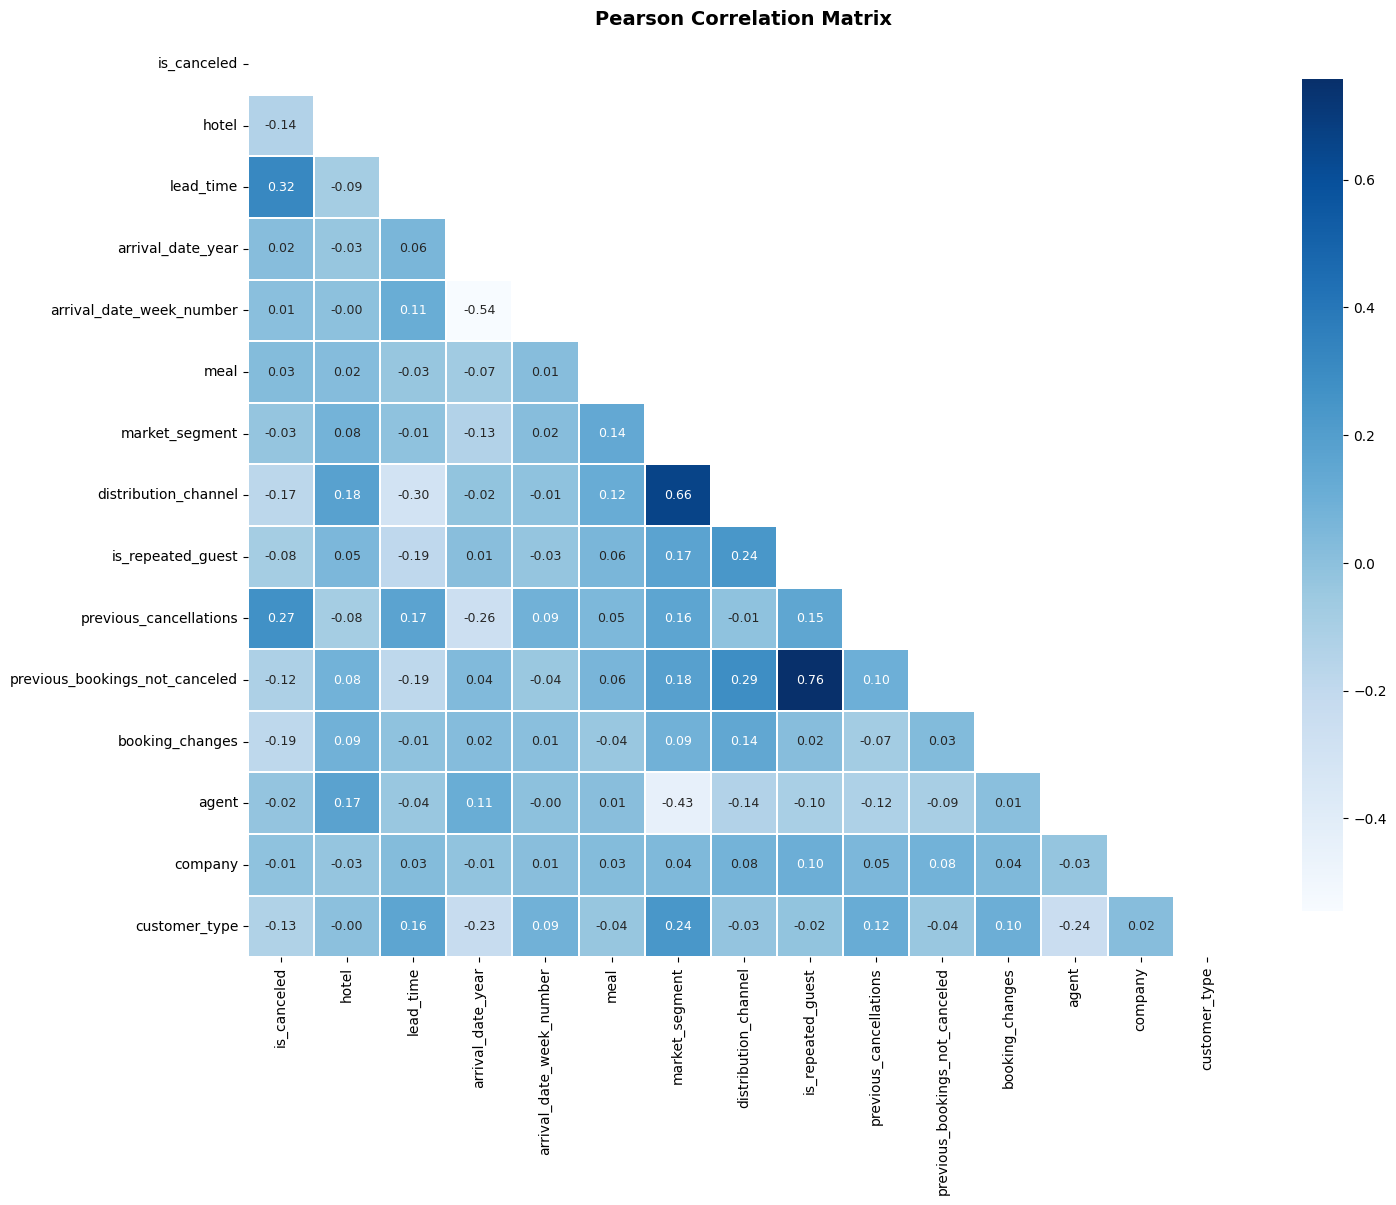

In [10]:
aux = pd.concat([y,X], axis=1)

mask = np.zeros_like(aux.corr(), dtype=bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=14, fontweight='bold')
sns.heatmap(aux.corr(method='spearman'), linewidths=0.25,fmt=".2f", cmap="Blues", linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});

In [ ]:
#lightgbm.plot_importance(lgbm, figsize=(10, 9));

In [ ]:
# fi_lgbm = pd.DataFrame({
#     'feature': X_train.columns,
#     'importance': lgbm.feature_importances_
# }).sort_values('importance', ascending=False)

# plt.figure(figsize=(10,6))
# plt.title('Feature Importance - LGBM Classifier')
# sns.barplot(data=fi_lgbm.head(20), x='importance', y='feature', color='SteelBlue');

In [20]:
filepath = '/home/alysson/projects/Hotel-Booking-Cancelations/models/lgbm/lgbm_10-06-23.pkl'
with open(filepath, 'rb') as file:
    lgbm = pickle.load(file)

### <div style="color:white;display:fill;border-radius:5px;background-color:#4F4F4F;letter-spacing:0.5px;overflow:hidden"><p style="padding:10px;color:white;overflow:hidden;text-align: center;margin:0;font-size:120%">SHAP</p></div>

In [22]:
shap.initjs()

In [23]:
lgbm.fit(X, y)
explainer = shap.Explainer(lgbm, X)
shap_values = explainer(X)

100%|===================| 119323/119389 [09:05<00:00]        

In [24]:
#300 Not Canceled, Resort Hotel, Parking Required - Acertou
#96 Canceled, Native, Special Request - Acertou

#138,630 Canceled,
#630 Canceled
#120 Not Canceled, Resort Hotel, Native
#151 Not Canceled, Resort Hotel, No Native

#96655 Not Canceled, City Hotel, No Native
#95241 Not Canceled City Hotel, No Native
idx = 96655

In [25]:
data.iloc[idx,:]

hotel                                City Hotel
is_canceled                                   0
lead_time                                   186
arrival_date_year                          2016
arrival_date_month                    September
arrival_date_week_number                     36
arrival_date_day_of_month                     2
stays_in_weekend_nights                       2
stays_in_week_nights                          2
adults                                        2
children                                      0
babies                                        0
meal                                         BB
country                                     DEU
market_segment                    Offline TA/TO
distribution_channel                      TA/TO
is_repeated_guest                             0
previous_cancellations                        0
previous_bookings_not_canceled                0
reserved_room_type                            A
assigned_room_type                      

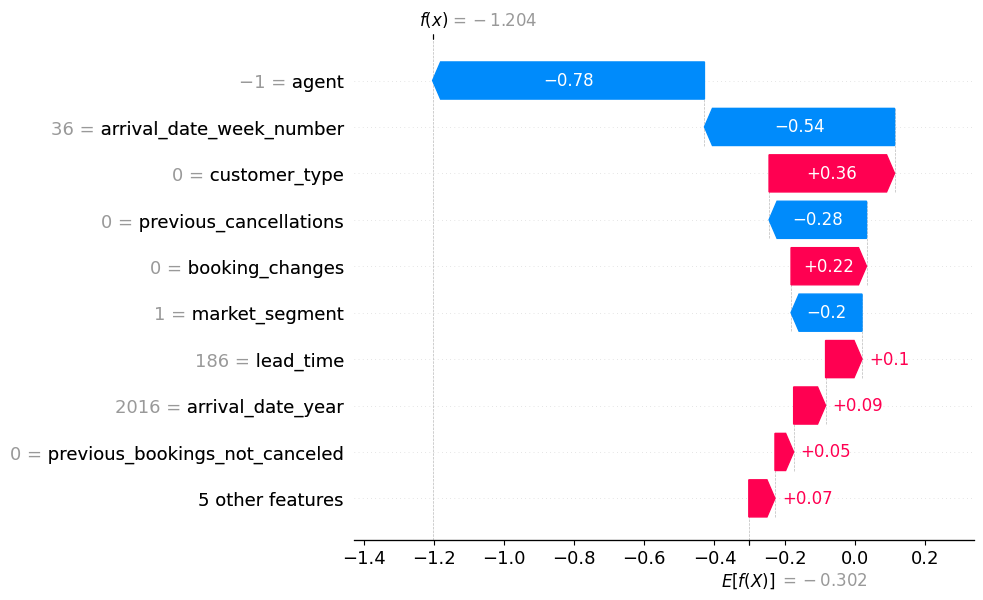

In [26]:
shap.plots.waterfall(shap_values[idx,:])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


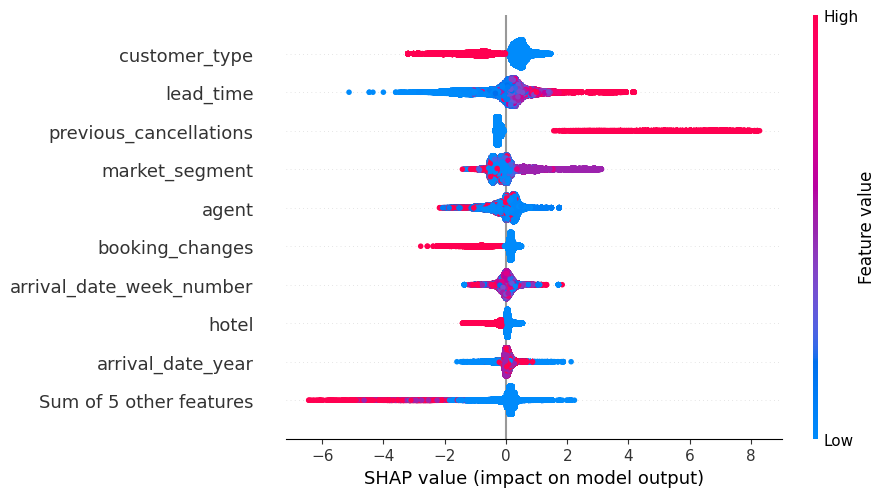

In [27]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

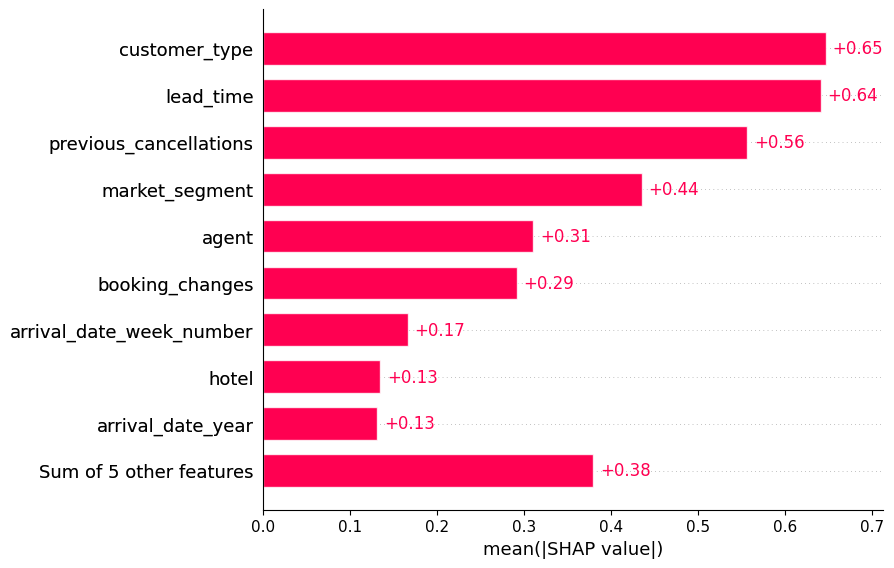

In [28]:
shap.plots.bar(shap_values)

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
# shap.plots.scatter(shap_values[:,"continentes"])#, color=shap_values

# shap.plots.scatter(shap_values[:,"days_stay"],
#                    color=shap_values[:,"adr"])